In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib

import cv2
import numpy as np

# print(tf.__version__)

C:\Users\Rakesh Kumar\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# !pip install tensorflow
# !pip install --upgrade pip
# !pip install tensorflow
# To generate GIFs
# !pip install -q imageio

# !pip install tensorflow-datasets



In [4]:
 mnist = keras.datasets.mnist
# x_train1 , y_train1, x_test1, y_test1 = mnist.load_data() #get error
(x_train , y_train), (x_test, y_test) = mnist.load_data()


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
x_train , x_test = x_train / 255.0, x_test / 255.0

In [7]:
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10 , activation = "softmax")
    
])

In [11]:
# model.compile(
# optimizer = "adam",
#     loss = "categoricalCrossEntropy",
#     metrics= [ "accuracy"]
# )


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2975 - accuracy: 0.9132
Epoch 2/3
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1443 - accuracy: 0.9577
Epoch 3/3
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1077 - accuracy: 0.9674


In [13]:
# model.fit(x_train, y_train,epochs=20)

In [14]:
# model.fit(x_train, y_train,epochs=3)

In [15]:
# model.fit(x_train, y_train,epochs=50)

# model_rf = RandomForestClassifier()
# model_rf.fit(x_train, y_train)


In [16]:
evaluate = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [37]:
# evaluate = model.evaluate(x_test, y_test)

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [21]:
print("test accuracy : ", test_accuracy)
print("test loss : ",test_loss)

test accuracy :  0.9745
test loss :  0.07875267100250348


In [22]:
# Dump the model to the file
# joblib.dump(model, "mnist_model")




# filename = 'finalized_model.sav'
# joblib.dump(model, filename)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


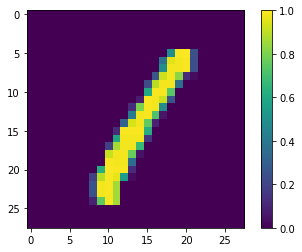

In [24]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [53]:
type(x_train)

numpy.ndarray

In [51]:
x_train.shape

(60000, 28, 28)

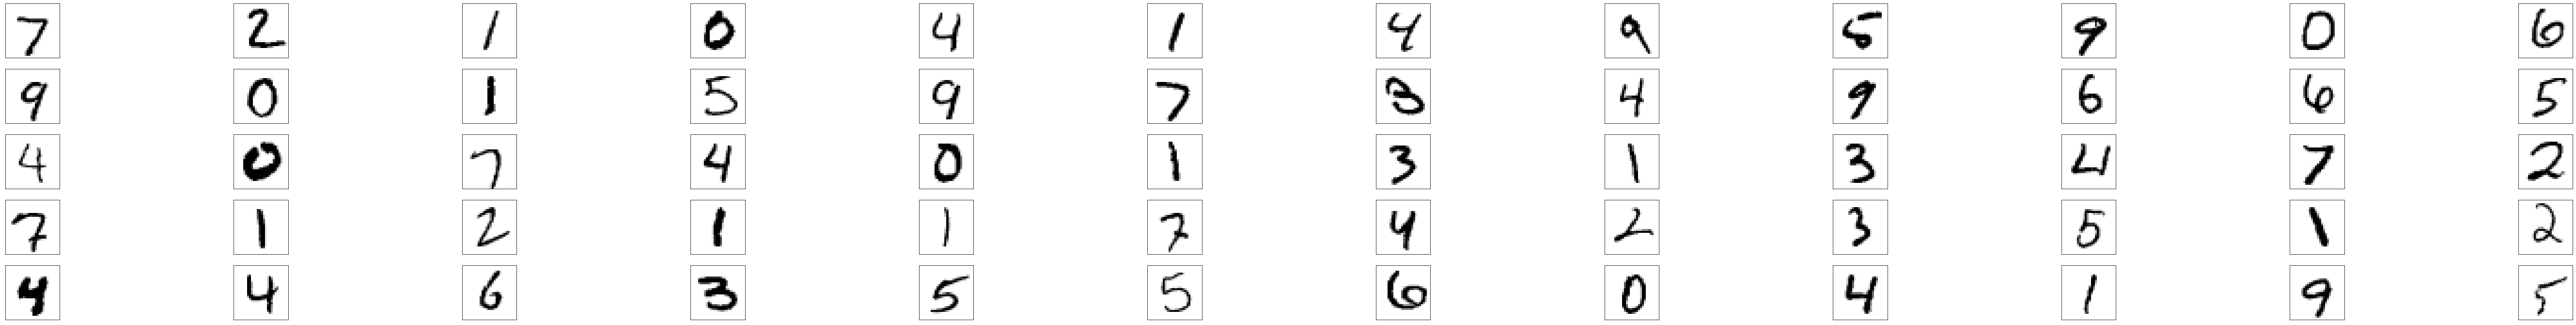

In [60]:
plt.figure(figsize=(100,12))
for i in range(60):
    plt.subplot(5,12,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    
plt.show()

In [48]:
index_3_is_0 = 3
index_2_is_1 = 2
index_1_is_2 = 1
index_30_is_3 = 30
index_4_is_4 = 4
index_15_is_5 = 15
index_11_is_6 = 11
index_17_is_7 = 17
index_1_is_8 = 1
index_12_is_9 = 12

img = x_test[30]

img_rezise = cv2.resize(img, (28,28))

cv2.imshow("image is", img_rezise)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [56]:
prediction = model.predict(x_test)

In [58]:
prediction[1]

array([1.1214940e-16, 7.0858710e-12, 1.0000000e+00, 5.4429318e-13,
       1.0793446e-32, 1.7349566e-17, 1.4226040e-16, 4.8669435e-30,
       3.2827625e-17, 3.5584741e-32], dtype=float32)

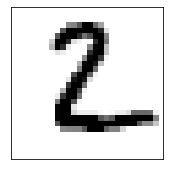

In [71]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], y_test, x_test)
# plt.subplot(1,2,2)
# plot_value_array(i, prediction[i],  x_test)
# plt.show()

In [ ]:

img = Image.open('data/mnist_data/validation/1/1_2.png').convert("L")
img = np.resize(img, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)

In [68]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

#     plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
#                                 100*np.max(predictions_array),
#                                 class_names[true_label]),
#                                 color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [35]:
from sklearn.datasets import fetch_mldata
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

np.random.seed(42)
mnist = fetch_mldata("MNIST original")
X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Train SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=10)
sgd_clf.fit(X_train, y_train)

# Print the accuracy of SGDClassifier
y_train_predict = sgd_clf.predict(X_train)
sgd_accuracy = accuracy_score(y_train, y_train_predict)
print("Accuracy is %s " % sgd_accuracy)

# Dump the model to the file
joblib.dump(sgd_clf, "mnist_model.pkl")


C:\Users\Rakesh Kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Rakesh Kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

In [ ]:
print("hi")

In [117]:
count_0 = 0
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0
count_6 = 0
count_7 = 0
count_8 = 0
count_9 = 0

index_list = []
dic_index_value = {}
predict_1 = model.predict(x_test)
for i in range(70):
    if(np.argmax(predict_1[i]) == 0) and  (count_0 == 0):
        count_0 = count_0 + 1
        print("index value is : ", i, " and Digit is : ", np.argmax(predict_1[i]))
        dic_index_value[i] = np.argmax(predict_1[i])
        index_list.append(i)
    
    elif(np.argmax(predict_1[i]) == 1) and  (count_1 == 0):
        count_1 = count_1 + 1
        print("index value is : ", i, " and Digit is : ", np.argmax(predict_1[i]))
        dic_index_value[i] = np.argmax(predict_1[i])
        index_list.append(i)
    
    elif(np.argmax(predict_1[i]) == 2) and  (count_2 == 0):
        count_2 = count_2 + 1
        print("index value is : ", i, " and Digit is : ", np.argmax(predict_1[i]))
        dic_index_value[i] = np.argmax(predict_1[i])
        index_list.append(i)
        
    elif(np.argmax(predict_1[i]) == 3) and  (count_3 == 0):
        count_3 = count_3 + 1
        print("index value is : ", i, " and Digit is : ", np.argmax(predict_1[i]))
        dic_index_value[i] = np.argmax(predict_1[i])
        index_list.append(i)
        
    elif(np.argmax(predict_1[i]) == 4) and  (count_4 == 0):
        count_4 = count_4 + 1
        print("index value is : ", i, " and Digit is : ", np.argmax(predict_1[i]))
        dic_index_value[i] = np.argmax(predict_1[i])
        index_list.append(i)
        
    elif(np.argmax(predict_1[i]) == 5) and  (count_5 == 0):
        count_5 = count_5 + 1
        print("index value is : ", i, " and Digit is : ", np.argmax(predict_1[i]))
        dic_index_value[i] = np.argmax(predict_1[i])
        index_list.append(i)
        
    elif(np.argmax(predict_1[i]) == 6) and  (count_6 == 0):
        count_6 = count_6 + 1
        print("index value is : ", i, " and Digit is : ", np.argmax(predict_1[i]))
        dic_index_value[i] = np.argmax(predict_1[i])
        index_list.append(i)
        
    elif(np.argmax(predict_1[i]) == 7) and  (count_7 == 0):
        count_7 = count_7 + 1
        print("index value is : ", i, " and Digit is : ", np.argmax(predict_1[i]))
        dic_index_value[i] = np.argmax(predict_1[i])
        index_list.append(i)
        
    elif(np.argmax(predict_1[i]) == 8) and  (count_8 == 0):
        count_8 = count_8 + 1
        print("index value is : ", i, " and Digit is : ", np.argmax(predict_1[i]))
        dic_index_value[i] = np.argmax(predict_1[i])
        index_list.append(i)
        
    elif(np.argmax(predict_1[i]) == 9) and  (count_9 == 0):
        count_9 = count_9 + 1
        print("index value is : ", i, " and Digit is : ", np.argmax(predict_1[i]))
        dic_index_value[i] = np.argmax(predict_1[i])
        index_list.append(i)
    





index value is :  0  and Digit is :  7
index value is :  1  and Digit is :  2
index value is :  2  and Digit is :  1
index value is :  3  and Digit is :  0
index value is :  4  and Digit is :  4
index value is :  7  and Digit is :  9
index value is :  8  and Digit is :  6
index value is :  15  and Digit is :  5
index value is :  18  and Digit is :  3
index value is :  61  and Digit is :  8


{0: 7, 1: 2, 2: 1, 3: 0, 4: 4, 7: 9, 8: 6, 15: 5, 18: 3, 61: 8}

In [118]:
print("index list value : ", index_list)
print("size of index", len(index_list))
print("before sorting : ",dic_index_value)
dic_index_value_sorted = dict(sorted(dic_index_value.items(), key=lambda x: x[1]))
print("after sorting  : ", dic_index_value_sorted)



index list value :  [0, 1, 2, 3, 4, 7, 8, 15, 18, 61]
size of index 10
before sorting :  {0: 7, 1: 2, 2: 1, 3: 0, 4: 4, 7: 9, 8: 6, 15: 5, 18: 3, 61: 8}
after sorting  :  {3: 0, 2: 1, 1: 2, 18: 3, 4: 4, 15: 5, 8: 6, 0: 7, 61: 8, 7: 9}


In [120]:
x_test_1 = x_test
y_test_1 = y_test

print(x_test.shape)
print(x_test_1.shape)
print(y_test.shape)

(10000, 28, 28)
(10000, 28, 28)
(10000,)


In [121]:
x_val = np.delete(x_test, index_list)
y_val = np.delete(y_test, index_list)
print("x_val shape : ",x_val.shape)
print("y_val shape : ",y_val.shape)


print("x_val type : ",type(x_val))
print("y_val type : ",type(y_val))

x_val shape :  (7839990,)
y_val shape :  (9990,)
x_val type :  <class 'numpy.ndarray'>
y_val type :  <class 'numpy.ndarray'>


In [104]:
print(type(x_test))
print(type(y_test))
print(type(x_test_1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [113]:
import numpy as np

a = np.array([1,2,3,4,5,6,7,8,9])
print(a)
print("shape : ", a.shape)
print("type : ", type(a))

index = [ 6, 1, 8, 3]
new_a = np.delete(a, index)

print("new array", new_a) #Prints `[1, 2, 5, 6, 8, 9]`
print("a : ",a)
print("shape : ", a.shape)
print("type : ", type(a))

[1 2 3 4 5 6 7 8 9]
shape :  (9,)
type :  <class 'numpy.ndarray'>
new array [1 3 5 6 8]
a :  [1 2 3 4 5 6 7 8 9]
shape :  (9,)
type :  <class 'numpy.ndarray'>


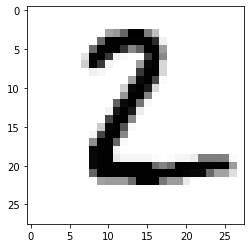

2


In [66]:
image_index = 1
plt.imshow(x_test[image_index].reshape(28, 28), cmap = "Greys")
plt.show()
# predictions = model.predict(x_test[image_index])
# print("predictions is ", predictions)

predict_1 = model.predict(x_test)
print(np.argmax(predict_1[image_index]))

In [31]:
img = x_test[3]

img_rezise = cv2.resize(img, (28,28))

cv2.imshow("image is", img_rezise)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [82]:
x_test.shape

(10000, 28, 28)

In [83]:
x_test[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    